In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
df = pd.read_csv("telco.csv")
df.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


In [5]:
df.shape
df.info()
df.isnull().sum()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   str    
 1   Gender                             7043 non-null   str    
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   str    
 4   Senior Citizen                     7043 non-null   str    
 5   Married                            7043 non-null   str    
 6   Dependents                         7043 non-null   str    
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   str    
 9   State                              7043 non-null   str    
 10  City                               7043 non-null   str    
 11  Zip Code                           7043 non-null   int64  
 12  Lat

Customer ID                             0
Gender                                  0
Age                                     0
Under 30                                0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Dependents                    0
Country                                 0
State                                   0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Population                              0
Quarter                                 0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                  

In [7]:
drop_cols = [
    'Customer ID',
    'Churn Score',
    'Churn Category',
    'Churn Reason',
    'Customer Status',
    'CLTV'
]

df.drop(columns=drop_cols, inplace=True)

In [8]:
df['Churn Label'] = df['Churn Label'].map({'Yes': 1, 'No': 0})


In [9]:
df.isnull().sum().sort_values(ascending=False)


Offer                                3877
Internet Type                        1526
Gender                                  0
Age                                     0
Married                                 0
Dependents                              0
Number of Dependents                    0
Country                                 0
State                                   0
City                                    0
Under 30                                0
Senior Citizen                          0
Latitude                                0
Zip Code                                0
Quarter                                 0
Longitude                               0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Population                              0
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                  

In [10]:
df.fillna(df.median(numeric_only=True), inplace=True)

,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,...,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Label
0,Male,78,No,Yes,No,No,0,United States,California,Los Angeles,...,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,3,1
1,Female,74,No,Yes,Yes,Yes,1,United States,California,Los Angeles,...,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,3,1
2,Male,71,No,Yes,No,Yes,3,United States,California,Los Angeles,...,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,2,1
3,Female,78,No,Yes,Yes,Yes,1,United States,California,Inglewood,...,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,2,1
4,Female,80,No,Yes,Yes,Yes,1,United States,California,Whittier,...,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,30,No,No,No,No,0,United States,California,Landers,...,Yes,Bank Withdrawal,21.15,1419.40,19.31,0,1639.44,3039.53,5,0
7039,Male,38,No,No,Yes,Yes,2,United States,California,Adelanto,...,Yes,Mailed Check,84.80,1990.50,48.23,0,865.20,2807.47,3,0
7040,Female,30,No,No,Yes,Yes,2,United States,California,Amboy,...,Yes,Credit Card,103.20,7362.90,45.38,0,2135.52,9453.04,4,0
7041,Female,32,No,No,Yes,Yes,2,United States,California,Angelus Oaks,...,Yes,Bank Withdrawal,29.60,346.45,27.24,0,0.00,319.21,4,0


<Axes: xlabel='Churn Label', ylabel='count'>

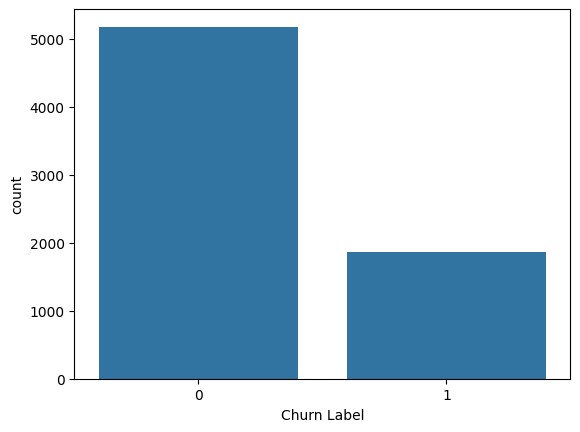

In [13]:
sns.countplot(x='Churn Label', data=df)

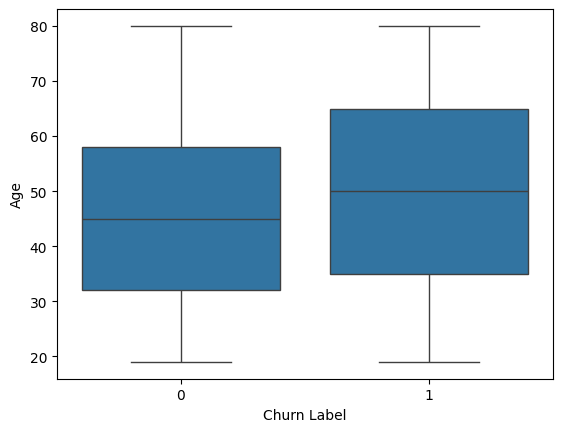

In [15]:
sns.boxplot(x='Churn Label', y='Age', data=df)
plt.show()

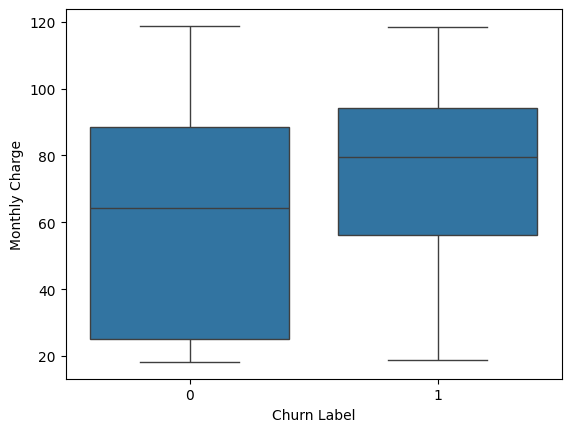

In [16]:
sns.boxplot(x='Churn Label', y='Monthly Charge', data=df)
plt.show()

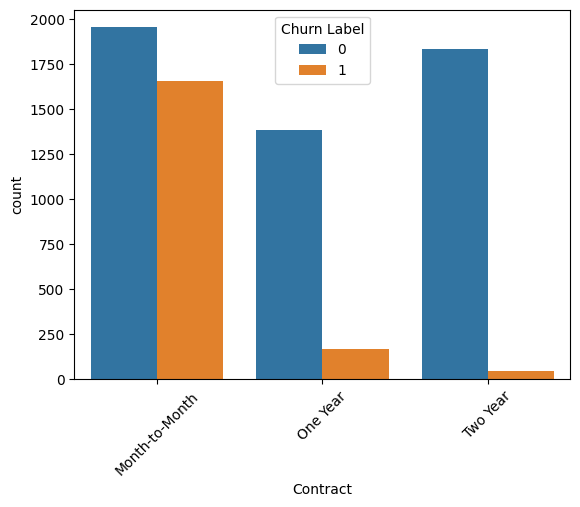

In [17]:
sns.countplot(x='Contract', hue='Churn Label', data=df)
plt.xticks(rotation=45)
plt.show()

In [18]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols

C:\Users\Mahi Kumari\AppData\Local\Temp\ipykernel_3508\910776789.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = df.select_dtypes(include='object').columns


Index(['Gender', 'Under 30', 'Senior Citizen', 'Married', 'Dependents',
       'Country', 'State', 'City', 'Quarter', 'Referred a Friend', 'Offer',
       'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method'],
      dtype='str')

In [19]:
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [21]:
X = df.drop('Churn Label', axis=1)
y = df['Churn Label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [22]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1035
           1       0.92      0.88      0.90       374

    accuracy                           0.95      1409
   macro avg       0.94      0.92      0.93      1409
weighted avg       0.95      0.95      0.95      1409



In [24]:
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1035
           1       0.97      0.84      0.90       374

    accuracy                           0.95      1409
   macro avg       0.96      0.92      0.93      1409
weighted avg       0.95      0.95      0.95      1409



In [25]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10)

Satisfaction Score             0.239092
Tenure in Months               0.043772
Contract_Two Year              0.039934
Number of Referrals            0.038732
Monthly Charge                 0.037955
Total Revenue                  0.037794
Total Charges                  0.035778
Total Long Distance Charges    0.031173
Avg Monthly GB Download        0.027357
Age                            0.022837
dtype: float64

In [28]:
df.head()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,...,Premium Tech Support_Yes,Streaming TV_Yes,Streaming Movies_Yes,Streaming Music_Yes,Unlimited Data_Yes,Contract_One Year,Contract_Two Year,Paperless Billing_Yes,Payment Method_Credit Card,Payment Method_Mailed Check
0,78,0,90022,34.023810,-118.156582,68701,0,1,0.00,8,...,False,False,True,False,False,False,False,True,False,False
1,74,1,90063,34.044271,-118.185237,55668,1,8,48.85,17,...,False,False,False,False,True,False,False,True,True,False
2,71,3,90065,34.108833,-118.229715,47534,0,18,11.33,52,...,False,True,True,True,True,False,False,True,False,False
3,78,1,90303,33.936291,-118.332639,27778,1,25,19.76,12,...,False,True,True,False,True,False,False,True,False,False
4,80,1,90602,33.972119,-118.020188,26265,1,37,6.33,14,...,False,False,False,False,True,False,False,True,False,False


In [32]:
df.to_csv("telco.csv", index=False)

In [34]:
df['Avg_Monthly_Revenue'] = df['Total Revenue'] / (df['Tenure in Months'] + 1)
df['High_Charges'] = (df['Monthly Charge'] > df['Monthly Charge'].median()).astype(int)

In [36]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 24.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

In [39]:
df.head()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,...,Streaming Movies_Yes,Streaming Music_Yes,Unlimited Data_Yes,Contract_One Year,Contract_Two Year,Paperless Billing_Yes,Payment Method_Credit Card,Payment Method_Mailed Check,Avg_Monthly_Revenue,High_Charges
0,78,0,90022,34.023810,-118.156582,68701,0,1,0.00,8,...,True,False,False,False,False,True,False,False,29.825000,0
1,74,1,90063,34.044271,-118.185237,55668,1,8,48.85,17,...,False,False,True,False,False,True,True,False,113.788889,1
2,71,3,90065,34.108833,-118.229715,47534,0,18,11.33,52,...,True,True,True,False,False,True,False,False,100.572632,1
3,78,1,90303,33.936291,-118.332639,27778,1,25,19.76,12,...,True,False,True,False,False,True,False,False,115.195000,1
4,80,1,90602,33.972119,-118.020188,26265,1,37,6.33,14,...,False,False,True,False,False,True,False,False,81.641053,1
